In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import datetime as dt
from sklearn.model_selection import GridSearchCV

In [18]:
#reading in data
#dropping extra index
df = pd.read_csv('Data/FDX_quarterly_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,year,month,decision,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,2000,6,2,1.136186,0.904524,0.023507,191.731841,11.900236,59.176580,52.247979,...,1.848972,36.594439,25.600683,11.958958,11.958958,8.402448,1.848972,0.0,14.202780,1.873532
1,2000,9,1,1.201710,0.974555,0.062247,197.680531,30.000269,78.743413,126.905678,...,2.132395,60.418305,-357.637011,32.641073,32.641073,13.872645,2.132395,0.0,138.121442,2.053819
2,2000,12,2,1.341269,1.102592,0.216925,199.343475,31.142068,80.295254,142.265787,...,2.464919,62.256618,276.214036,23.097371,23.097371,14.251809,2.464919,0.0,91.966698,2.344200
3,2001,3,2,1.273293,0.993598,0.048841,204.196952,30.351105,80.701038,128.473806,...,2.137396,95.155789,-39.533610,54.039416,54.039416,21.860891,2.137396,0.0,-735.557312,1.789780
4,2001,6,0,1.061408,0.808535,0.037329,178.772138,27.899411,71.980213,130.063525,...,2.034605,91.948859,26.232707,10.227671,10.227671,21.757138,2.034605,0.0,6.597145,1.764326


In [19]:
#splitting data
X = df.drop(['decision'], 1)
y = df.decision

#train test split
X_train, X_test, y_train, y_test, = train_test_split(X, y)
df

,year,month,decision,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,2000,6,2,1.136186,0.904524,0.023507,191.731841,11.900236,59.176580,52.247979,...,1.848972,36.594439,25.600683,11.958958,11.958958,8.402448,1.848972,0.000000,14.202780,1.873532
1,2000,9,1,1.201710,0.974555,0.062247,197.680531,30.000269,78.743413,126.905678,...,2.132395,60.418305,-357.637011,32.641073,32.641073,13.872645,2.132395,0.000000,138.121442,2.053819
2,2000,12,2,1.341269,1.102592,0.216925,199.343475,31.142068,80.295254,142.265787,...,2.464919,62.256618,276.214036,23.097371,23.097371,14.251809,2.464919,0.000000,91.966698,2.344200
3,2001,3,2,1.273293,0.993598,0.048841,204.196952,30.351105,80.701038,128.473806,...,2.137396,95.155789,-39.533610,54.039416,54.039416,21.860891,2.137396,0.000000,-735.557312,1.789780
4,2001,6,0,1.061408,0.808535,0.037329,178.772138,27.899411,71.980213,130.063525,...,2.034605,91.948859,26.232707,10.227671,10.227671,21.757138,2.034605,0.000000,6.597145,1.764326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,9,0,1.310216,1.177755,0.240463,199.371187,3.811983,52.972002,21.112013,...,2.377346,54.401340,-47.513480,71.732741,71.732741,11.400699,2.377346,0.004195,30.588361,2.231036
78,2019,12,0,1.251351,1.113113,0.192567,204.559282,3.689155,54.128430,21.026900,...,2.370898,73.345428,-121.160588,27.218979,27.218979,15.376029,2.370898,0.004115,36.321008,2.201267
79,2020,3,0,1.214625,1.073995,0.171041,194.595700,3.556174,51.538675,19.990957,...,2.080512,115.498134,-154.816648,30.217535,30.217535,24.212862,2.080512,0.004673,40.628440,1.932022
80,2020,6,2,1.583817,1.448473,0.471868,212.422514,3.705196,56.083351,21.175327,...,1.942924,-100.973859,51.410471,18.540555,18.540555,-21.249117,1.942924,0.005041,30.916064,1.843415


In [20]:
#algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#creating pipelines 
#Random Forest
pipeline_rf = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

#DecisionTree
pipeline_dt = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

#K Nearest Neighbors
pipeline_knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

In [22]:
#creating dictionary for models
pipelines = [pipeline_rf, pipeline_dt, pipeline_knn]

models = ['RandomForest', 'DecisionTree', 'KNN']
model_pipelines = dict(zip(models, pipelines))

In [23]:
# Looping through each Pipeline to fit and train each model
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', RandomForestClassifier())])
Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])


In [24]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in model_pipelines.items():
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell','Buy', 'Hold'], output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1

    print(f1)


RandomForest (Macro Avg - F1 Score):
0.4243386243386243

DecisionTree (Macro Avg - F1 Score):
0.26666666666666666

KNN (Macro Avg - F1 Score):
0.3956043956043956


In [25]:
# Creating parameters to iterate through for each classifier
rf_params = {'clf__n_estimators': [10,50,100,200],
             'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 2, 5],
             'clf__min_samples_split': [2,4,8],
             'clf__min_samples_leaf': [1, 2, 5]}

dt_params = {'clf__criterion': ['gini', 'entropy'],
             'clf__splitter': ['best', 'random'],
             'clf__max_depth': [None, 2, 5],
             'clf__min_samples_split': [2, 4, 8],
             'clf__min_samples_leaf': [1,3,5]}

knn_params = {"clf__n_neighbors": [5, 25, 50, 100, 200],
              "clf__weights": ['uniform', 'distance'],
              "clf__p": [1,2]}

In [26]:
# Dictionary of classifiers with their params
classifiers = {'RandomForest': [pipeline_rf, rf_params], 'DecisionTree': [pipeline_dt, dt_params]}
classifiers

{'RandomForest': [Pipeline(steps=[('scale', StandardScaler()), ('clf', RandomForestClassifier())]),
  {'clf__n_estimators': [10, 50, 100, 200],
   'clf__criterion': ['gini', 'entropy'],
   'clf__max_depth': [None, 2, 5],
   'clf__min_samples_split': [2, 4, 8],
   'clf__min_samples_leaf': [1, 2, 5]}],
 'DecisionTree': [Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier())]),
  {'clf__criterion': ['gini', 'entropy'],
   'clf__splitter': ['best', 'random'],
   'clf__max_depth': [None, 2, 5],
   'clf__min_samples_split': [2, 4, 8],
   'clf__min_samples_leaf': [1, 3, 5]}]}

In [27]:
# Dictionary storing the best estimators for each classifier
best_est = {}

# Grid Searching each classifier
for name, vals in classifiers.items():
    print(name + ' -'*30)
    
    # Grid Searching 
    gridsearch = GridSearchCV(vals[0], vals[1] , cv=3, return_train_score=True, verbose=2, scoring='f1_macro')
    gridsearch.fit(X_train, y_train)
    
    # Printing out the best parameters for the selected classifier
    print(name+' Best Parameters: ', gridsearch.best_params_)
    
    # Saving the best estimators/tuned models
    best_est[name+'_clf'] = gridsearch.best_estimator_

RandomForest - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, c

In [28]:
# Looping through each tuned model's predictions and getting their classification reports
for name, pipe in best_est.items():
    print('\nTuned '+ name + ' (Macro Avg - F1 Score):')
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    print(report['macro avg']['f1-score'])


Tuned RandomForest_clf (Macro Avg - F1 Score):
0.3666666666666667

Tuned DecisionTree_clf (Macro Avg - F1 Score):
0.37719298245614036


In [29]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax


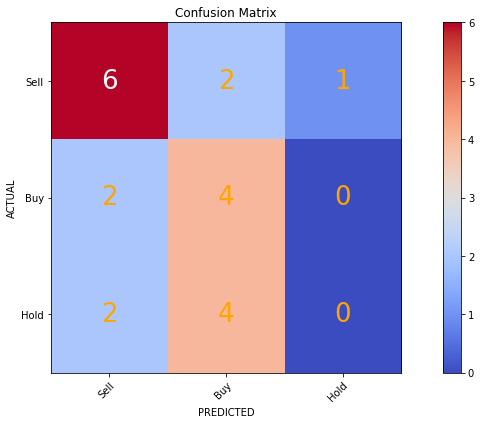

precision    recall  f1-score   support

        Sell       0.60      0.67      0.63         9
         Buy       0.40      0.67      0.50         6
        Hold       0.00      0.00      0.00         6

    accuracy                           0.48        21
   macro avg       0.33      0.44      0.38        21
weighted avg       0.37      0.48      0.41        21



In [32]:
plot_confusion_matrix(y_test, best_est['DecisionTree_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

# Final Classification Report
print(classification_report(y_test, best_est['DecisionTree_clf'].predict(X_test), target_names=['Sell', 'Buy', 'Hold']))